In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [178]:
# functions

def plot_bar_chart(xvals, yvals, xlabel, ylabel, title, width = 0.35, color = 'purple'):

    counts = yvals

    ind = np.arange(len(xvals))  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, counts, width, color=color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(xvals)
    
    plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels

    plt.show()
    
def plot_line_graph(df, var, title, xlabel, ylabel):
    
    x = list(df.index.values)
    y = list(df[var].values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x,y)
    plt.show()
    
def convert_score_to_grade(score):
    if score >= 94:
        return "A"
    elif score >= 81 and score <= 93:
        return "B"
    else:
        return C
    
def get_year_from_string(s):
    
    if s == ' ':
        return ' '
    
    dt = datetime.strptime(s, '%m/%d/%Y %H:%M')
    return dt.year




In [163]:
grades = pd.read_csv('food establishment grades.csv')
violations = pd.read_csv('food establishment violations.csv')

In [164]:
grades.shape, violations.shape

((109291, 12), (494520, 15))

In [23]:
list(set(grades.columns) - set(violations.columns)), list(set(violations.columns) - set(grades.columns))

(['GRADE', 'SUM_VIOLATIONS', 'SCORE'],
 ['VIOLSTATUS',
  'VIOLDESC',
  'LOCATION',
  'VIOLATION',
  'PROPERTY_ID',
  'VIOLDTTM',
  'VIOLLEVEL'])

In [8]:
combined = pd.merge(grades, violations, on=['LICENSENO', 'ISSDTTM', 'EXPDTTM', 'RESULTDTTM', 'RESULT',
                                           'LICSTATUS', 'LICENSECAT', 'DESCRIPT'])
combined_cols = set(grades.columns).intersection(violations.columns)

In [11]:
combined.head().style

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE,VIOLATION,VIOLLEVEL,VIOLDESC,VIOLDTTM,VIOLSTATUS,PROPERTY_ID,LOCATION
0,19695,1/11/2012 13:43,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_NotReq,1/2/2008 8:52,0,100,A,nan,nan,nan,,nan,nan,nan
1,19695,1/11/2012 13:43,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_NotReq,1/2/2008 8:53,0,100,A,nan,nan,nan,,nan,nan,nan
2,26575,4/20/2011 12:14,12/31/2010 0:00,Inactive,FT,Eating & Drinking w/ Take Out,HE_NotReq,1/2/2008 8:56,0,100,A,nan,nan,nan,,nan,156440,"(42.341768000, -71.086701000)"
3,20438,12/28/2011 10:04,12/31/2014 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Fail,1/2/2008 10:00,36,64,C,02-3-602.11-.12/3-302.12,*,Food Container Labels,1/2/2008 15:38,Fail,153922,"(42.337388000, -71.106281000)"
4,20438,12/28/2011 10:04,12/31/2014 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Fail,1/2/2008 10:00,36,64,C,03-3-501.16(A),***,Cold Holding,1/2/2008 15:38,Fail,153922,"(42.337388000, -71.106281000)"


### In the combined data frame each row is a violation. It differs from the original violations data frame in that it also provides the grade and score that was ultimately associated with that violation. 

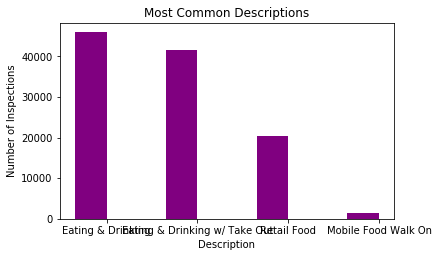

In [16]:
d = grades.DESCRIPT.value_counts()
plot_bar_chart(list(d.index),list(d), 'Description', 'Number of Inspections', 'Most Common Descriptions')

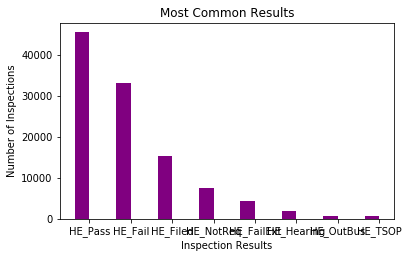

In [17]:
r = grades.RESULT.value_counts()
plot_bar_chart(list(r.index),list(r), 'Inspection Results', 'Number of Inspections', 'Most Common Results')

In [158]:
v = combined.RESULT.value_counts()
v.sum() 
208729 / 492866

0.4235005052083122

### 42% of inspections violations (42%) were associated with a failing inspection. 

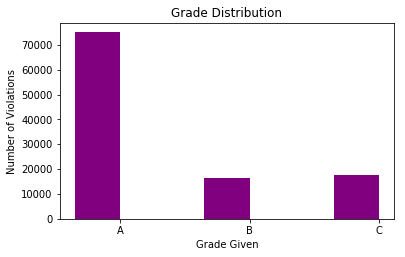

In [19]:
g = grades.GRADE.value_counts()
gx = ('A', 'B', 'C')
gy = (75066, 16406, 17819)
plot_bar_chart(gx, gy, 'Grade Given', 'Number of Violations', 'Grade Distribution')

### While the majority of establishments were given an "A", an about equal number of establishments were given a "B" or a "C"

In [76]:
"A", grades[grades.GRADE =='A'].SCORE.mean(), "B", grades[grades.GRADE =='B'].SCORE.mean(), "C", grades[grades.GRADE =='C'].SCORE.mean()

('A', 99.05912130658353, 'B', 87.4039375838108, 'C', 62.29451708850104)

In [78]:
"A", grades[grades.GRADE =='A'].SCORE.median(), "B", grades[grades.GRADE =='B'].SCORE.median(), "C", grades[grades.GRADE =='C'].SCORE.median()

('A', 100.0, 'B', 88.0, 'C', 68.0)

#### The above are the average and median scores for each of the grades. These can be used to create thresholds. 

In [169]:
failed_v = combined[(combined.RESULT == 'HE_Fail') | (combined.RESULT =='HE_FailExt')]

In [170]:
failed_v.head()

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE,VIOLATION,VIOLLEVEL,VIOLDESC,VIOLDTTM,VIOLSTATUS,PROPERTY_ID,LOCATION
3,20438,12/28/2011 10:04,12/31/2014 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Fail,1/2/2008 10:00,36,64,C,02-3-602.11-.12/3-302.12,*,Food Container Labels,1/2/2008 15:38,Fail,153922.0,"(42.337388000, -71.106281000)"
4,20438,12/28/2011 10:04,12/31/2014 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Fail,1/2/2008 10:00,36,64,C,03-3-501.16(A),***,Cold Holding,1/2/2008 15:38,Fail,153922.0,"(42.337388000, -71.106281000)"
5,20438,12/28/2011 10:04,12/31/2014 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Fail,1/2/2008 10:00,36,64,C,08-3-305-307.11,*,Food Protection,1/2/2008 15:38,Fail,153922.0,"(42.337388000, -71.106281000)"
6,20438,12/28/2011 10:04,12/31/2014 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Fail,1/2/2008 10:00,36,64,C,12-3--301.11,***,Prevention of Contamination from Hands,1/2/2008 15:38,Fail,153922.0,"(42.337388000, -71.106281000)"
7,20438,12/28/2011 10:04,12/31/2014 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Fail,1/2/2008 10:00,36,64,C,21-3-304.14,*,Wiping Cloths Clean Sanitize,1/2/2008 15:38,Fail,153922.0,"(42.337388000, -71.106281000)"


In [171]:
failed_v.columns

Index(['LICENSENO', 'ISSDTTM', 'EXPDTTM', 'LICSTATUS', 'LICENSECAT',
       'DESCRIPT', 'RESULT', 'RESULTDTTM', 'SUM_VIOLATIONS', 'SCORE', 'GRADE',
       'VIOLATION', 'VIOLLEVEL', 'VIOLDESC', 'VIOLDTTM', 'VIOLSTATUS',
       'PROPERTY_ID', 'LOCATION'],
      dtype='object')

In [172]:
failed_v[['LICENSENO', 'SUM_VIOLATIONS']].groupby(['LICENSENO']).mean().median()

SUM_VIOLATIONS    21.192308
dtype: float64

### An establishment that had received a failing result had a median of 22.33 violation points. 

In [173]:
failed_v.VIOLDESC.value_counts().head().to_frame()

,VIOLDESC
Non-Food Contact Surfaces Clean,18831
Improper Maintenance of Walls/Ceilings,17650
Non-Food Contact Surfaces,15413
Improper Maintenance of Floors,14506
Food Protection,13784


In [174]:
grades[grades.LICENSENO == 4032]

,Unnamed: 0,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
3535,4,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Fail,5/22/2008 12:35,20,80,C
4089,10,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Hearing,6/10/2008 14:32,18,82,B
4324,13,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Pass,6/20/2008 11:34,0,100,A
8615,12,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Pass,12/9/2008 12:46,0,100,A
12235,3,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Fail,4/17/2009 13:00,21,79,C
12417,9,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Hearing,4/24/2009 13:27,10,90,B
12573,8,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Filed,4/30/2009 13:33,2,98,A
16597,2,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Fail,10/14/2009 12:42,22,78,C
16924,7,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Filed,10/28/2009 10:45,8,92,B
47213,11,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_NotReq,12/30/2012 0:00,0,100,A


In [175]:
temp = grades.groupby("LICENSENO").count()

In [176]:
temp.head()

,Unnamed: 0,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
LICENSENO,,,,,,,,,,,
54,1,1,1,1,1,1,1,1,1,1,1
4032,10,10,10,10,10,10,10,10,10,10,10
4036,28,28,28,28,28,28,28,28,28,28,28
17602,13,13,13,13,13,13,13,13,13,13,13
17603,1,1,1,1,1,1,1,1,1,1,1


In [177]:
temp.columns

Index(['Unnamed: 0', 'ISSDTTM', 'EXPDTTM', 'LICSTATUS', 'LICENSECAT',
       'DESCRIPT', 'RESULT', 'RESULTDTTM', 'SUM_VIOLATIONS', 'SCORE', 'GRADE'],
      dtype='object')

In [68]:
cs = temp['ISSDTTM' ]

In [67]:
summarized = grades.groupby("LICENSENO").mean()

In [69]:
cs.head()

LICENSENO
54        1
4032     10
4036     28
17602    13
17603     1
Name: ISSDTTM, dtype: int64

In [70]:
summarized['num_inspections'] = cs.values

In [81]:
summarized['Average score'] = summarized.SCORE.apply(convert_score_to_grade,)

In [80]:
summarized.head()

,SUM_VIOLATIONS,SCORE,num_inspections
LICENSENO,,,
54,0.000000,100.000000,1
4032,10.100000,89.900000,10
4036,6.607143,93.392857,28
17602,1.615385,98.384615,13
17603,0.000000,100.000000,1


In [82]:
summarized.head()

,SUM_VIOLATIONS,SCORE,num_inspections,Average score
LICENSENO,,,,
54,0.000000,100.000000,1,A
4032,10.100000,89.900000,10,B
4036,6.607143,93.392857,28,C
17602,1.615385,98.384615,13,A
17603,0.000000,100.000000,1,A


In [86]:
summ_A = summarized[summarized['Average score'] == 'A']
summ_B = summarized[summarized['Average score'] == 'B']
summ_C = summarized[summarized['Average score'] == 'C']

In [89]:
"A", summ_A.num_inspections.mean(), "B", summ_B.num_inspections.mean(), "C", summ_C.num_inspections.mean()

('A', 8.956461644782308, 'B', 20.101358411703238, 'C', 17.688022284122564)

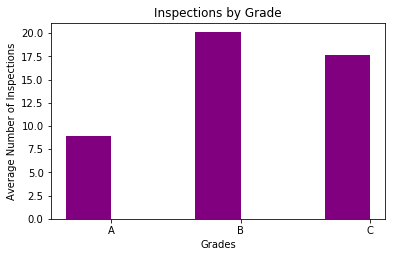

In [90]:
letters = ("A", "B", "C")
vals = (8.956461644782308, 20.101358411703238, 17.688022284122564)
plot_bar_chart(letters, vals, "Grades", "Average Number of Inspections", "Inspections by Grade", width = 0.35, color = 'purple')

### An establishment that tended to receive scores in the "A" range had an average of 9 inspections, while those in the "B" range had 20, and "C" range had 18, all within the same time period. 

In [96]:
dates = grades.groupby('ISSDTTM').count()
dates['Year'] = dates.index
dates['Year'] = dates.Year.apply(get_year_from_string,)
by_year = dates.groupby('Year').count()

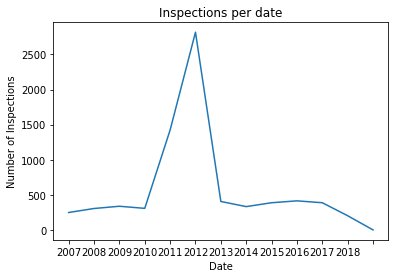

In [148]:
plot_line_graph(by_year, 'LICENSENO', 'Inspections per date', "Date", "Number of Inspections")

### So many inspections in 2010 - 2012! 

In [149]:
grades.describe()

,LICENSENO,SUM_VIOLATIONS,SCORE
count,109291.000000,109291.000000,109291.000000
mean,47746.202798,8.684640,91.315360
std,51098.875086,15.827821,15.827821
min,54.000000,0.000000,-147.000000
25%,21466.000000,0.000000,88.000000
50%,25653.000000,2.000000,98.000000
75%,68162.000000,12.000000,100.000000
max,367152.000000,247.000000,100.000000


In [151]:
diff = grades.sort_values(by=['LICENSENO', 'ISSDTTM'])

diff['difference'] = diff.groupby(['LICENSENO'])['SCORE'].diff().fillna(0)

In [160]:
diff

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE,difference
47212,54,9/4/2008 9:49,12/31/2007 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_NotReq,12/30/2012 0:00,0,100,A,0.0
3535,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Fail,5/22/2008 12:35,20,80,C,0.0
4089,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Hearing,6/10/2008 14:32,18,82,B,2.0
4324,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Pass,6/20/2008 11:34,0,100,A,18.0
8615,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Pass,12/9/2008 12:46,0,100,A,0.0
12235,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Fail,4/17/2009 13:00,21,79,C,-21.0
12417,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Hearing,4/24/2009 13:27,10,90,B,11.0
12573,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Filed,4/30/2009 13:33,2,98,A,8.0
16597,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Fail,10/14/2009 12:42,22,78,C,-20.0
16924,4032,10/8/2010 8:56,12/31/2010 23:59,Inactive,RF,Retail Food,HE_Filed,10/28/2009 10:45,8,92,B,14.0


In [162]:
diff[diff.RESULT == 'HE_FailExt']

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE,difference
18319,4036,2/15/2012 15:10,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,12/18/2009 15:10,4,96,A,17.0
56415,4036,2/15/2012 15:10,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,6/18/2013 10:52,4,96,A,0.0
78222,4036,2/15/2012 15:10,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,8/4/2015 14:12,12,88,B,2.0
11651,17611,2/14/2012 14:20,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_FailExt,3/31/2009 11:36,10,90,B,37.0
88589,17611,2/14/2012 14:20,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_FailExt,7/21/2016 12:23,2,98,A,20.0
88976,17611,2/14/2012 14:20,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_FailExt,8/5/2016 14:11,2,98,A,0.0
56200,18006,4/18/2012 15:12,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_FailExt,6/7/2013 12:34,2,98,A,14.0
8491,18009,3/8/2012 14:55,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,12/5/2008 10:26,22,78,C,2.0
18791,18009,3/8/2012 14:55,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/8/2010 12:46,28,72,C,30.0
19997,18009,3/8/2012 14:55,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,2/19/2010 12:15,2,98,A,26.0


In [180]:
grades[grades.RESULT == 'HE_FailExt'].sort_values(by=['LICENSENO', 'ISSDTTM'])

,Unnamed: 0,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
18319,20,4036,2/15/2012 15:10,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,12/18/2009 15:10,4,96,A
56415,21,4036,2/15/2012 15:10,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,6/18/2013 10:52,4,96,A
78222,22,4036,2/15/2012 15:10,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,8/4/2015 14:12,12,88,B
11651,133,17611,2/14/2012 14:20,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_FailExt,3/31/2009 11:36,10,90,B
88589,134,17611,2/14/2012 14:20,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_FailExt,7/21/2016 12:23,2,98,A
88976,135,17611,2/14/2012 14:20,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_FailExt,8/5/2016 14:11,2,98,A
56200,207,18006,4/18/2012 15:12,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_FailExt,6/7/2013 12:34,2,98,A
8491,240,18009,3/8/2012 14:55,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,12/5/2008 10:26,22,78,C
18791,237,18009,3/8/2012 14:55,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/8/2010 12:46,28,72,C
19997,241,18009,3/8/2012 14:55,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,2/19/2010 12:15,2,98,A
